In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random



In [30]:
def model(time, frequency, amplitude, offset,T2):
    return amplitude * np.cos(2 * np.pi * frequency * time)*np.exp(-time/T2) + offset

def step(time, probs, probs_bins, frequency, amplitude, offset,T2, num_measurements = 1):
    measurement = 0
    for i in range(num_measurements):
        measurement += 1.0* (random.random() < model(time, frequency, amplitude, offset,T2))
    measurement /= num_measurements
    r = measurement-0.5

    for p in range(len(probs)):
        probs[p] = probs[p] * (0.5 + r * model(time, probs_bins[p], amplitude, offset,100))
    probs = probs/sum(probs)
    return probs

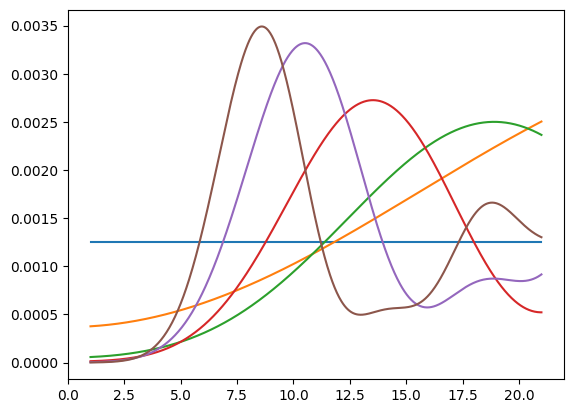

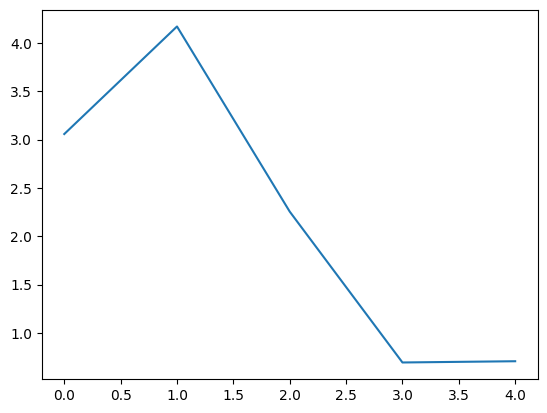

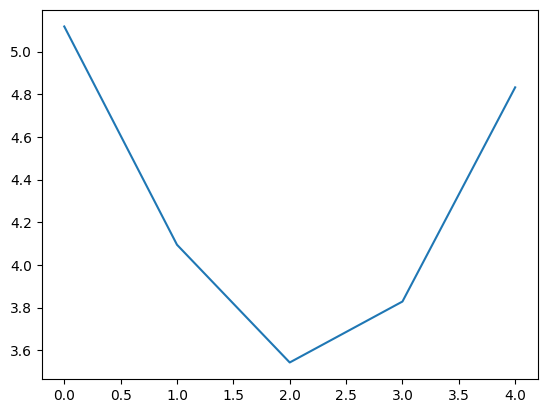

11.708020536657347


In [31]:

frequency = 11 # MHz
amplitude = 0.8
offset = -0.01
time = 0.016 
T2 = 100

probs_bins = np.linspace(frequency-10,frequency+10, 801)
probs = np.ones(len(probs_bins))/len(probs_bins)

freqs = []
stds = []
plt.plot(probs_bins, probs)
for i in range(5):    
    probs = step(time, probs, probs_bins, frequency, amplitude, offset, T2,num_measurements = 1)
    current_freq = np.sum(probs * probs_bins)
    time += 0.016
    freqs.append(current_freq)
    stds.append(np.sqrt(np.sum(probs * (probs_bins-current_freq)**2)))
    plt.plot(probs_bins, probs)
plt.show()
plt.plot(np.abs(np.array(freqs)-frequency))
# plt.yscale('log')
plt.show()
plt.plot(stds)
# plt.yscale('log')
plt.show()
print(freqs[-1])

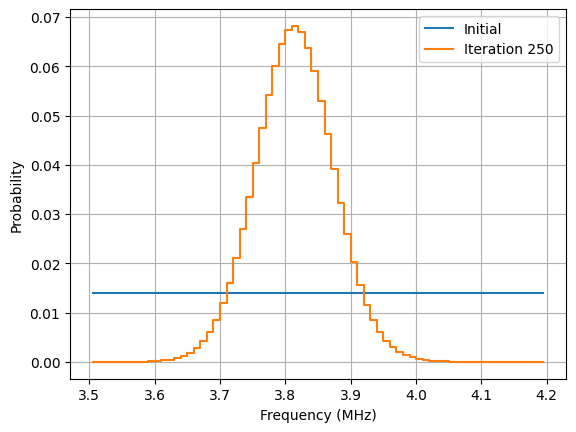

In [79]:

frequency = 3.9 # MHz
amplitude = 0.4
offset = -0.01
time = 0.016 
T2 = 100

probs_bins = np.linspace(3.5,4.2, 71)
probs = np.ones(len(probs_bins))/len(probs_bins)

freqs = []
stds = []
# To avoid the last bin being too high, plot the histogram using the bin centers and bar plot
bin_centers = 0.5 * (probs_bins[:-1] + probs_bins[1:])
probs_plot = probs[:-1]  # ignore the last bin edge for plotting
full_times = np.linspace(0, 0.15,101)
real_vals = model(full_times, frequency, amplitude, offset, T2)

f,ax2 = plt.subplots(1,1)

ax2.plot(bin_centers, probs_plot, drawstyle='steps-mid', label='Initial')
np.random.seed(100)

for i in range(250):    
    probs = step(time, probs, probs_bins, frequency, amplitude, offset, T2, num_measurements=1)
    current_freq = np.sum(probs * probs_bins)
    time += 0.004
    freqs.append(current_freq)
    stds.append(np.sqrt(np.sum(probs * (probs_bins-current_freq)**2)))
probs_plot = probs[:-1]
ax2.plot(bin_centers, probs_plot, drawstyle='steps-mid', label=f'Iteration {i+1}')
    # f,ax = plt.subplots(1,1)
    # ax.plot(full_times, real_vals)
    # ax.axvline(time, color='r')
    
# ax.set_xlabel('Time')
# ax.set_ylabel('Amplitude')
# ax2.set_ylim([0,0.1])
ax2.set_xlabel('Frequency (MHz)')
ax2.set_ylabel('Probability')
ax2.legend()
ax2.grid()
plt.show()



In [75]:
# Calculate the width (standard deviation) of the distribution in probs_plot
width = np.sqrt(np.sum(probs_plot * (bin_centers - np.sum(probs_plot * bin_centers))**2))
width*2

max_freq = bin_centers[np.argmax(probs_plot)]
max_freq


3.885

In [76]:
probs = np.ones(len(probs_bins))/len(probs_bins)
for i in range(250):    
    probs = step(time, probs, probs_bins, frequency, amplitude, offset, T2, num_measurements=1)
    current_freq = np.sum(probs * probs_bins)
    time += 0.004
    freqs.append(current_freq)
    stds.append(np.sqrt(np.sum(probs * (probs_bins-current_freq)**2)))
max_freq = bin_centers[np.argmax(probs)]
max_freq
    

3.9050000000000002